<a href="https://colab.research.google.com/github/Ben-Foxman/Quantum-Exploration/blob/main/algorithms/grovers_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Implementation of Grover's Algorithm    Ben Foxman
import numpy as np
import matplotlib.pyplot as plt
from qiskit import *

Grover's Algorithm: Quanutm Search. Good resource: https://qiskit.org/textbook/ch-algorithms/grover.html.


In [ ]:
data = [1, 3, 4, 5, 2, 4, 3, 1, 6]
target = 6
# concept of an "oracle" - function that gives 1 on the target, 0 otherwis
def y(x, target):
  return int(x == target) # 1 if x is the target, 0 otherwise

0 1


Grover's algorithm starts by initializing every state to have equal probability (achieved by an equal superposition on each qubit). Then, an "oracle" is used to phase filp to state we want to search for. Finally, iterate a "Grover diffusion operator" - a clever way to amplify the amplitudes of states with negative phase, taking advantage of their farther distance away from the mean amplitude. 

In [357]:
# the "oracle":  the job of the oracle is to take in 2^nqbit inputs and return 1 for the desired target, 0 otherwise
nqbits = 4
oracle = QuantumCircuit(nqbits, name='oracle')
oracle.h(list(range(nqbits)))
oracle.h(nqbits-1)
oracle.mct(list(range(nqbits-1)), nqbits-1)  # multi-controlled-z
oracle.h(nqbits-1)
oracle.to_gate() # make gate to embed in overall algorithm


In [358]:
grover = QuantumCircuit(nqbits, name='grover')
# then iterate a "grover diffusion operator" 
niterations = int(np.ceil(np.sqrt(nqbits))) # this converges at O(sqrt(n)) 
for i in range(niterations):
  grover.h(list(range(nqbits)))
  grover.z(list(range(nqbits)))
  grover.h(nqbits-1)
  grover.mct(list(range(nqbits-1)), nqbits-1)  # multi-controlled-z
  grover.h(nqbits-1)
  grover.h(list(range(nqbits)))
  grover.append(oracle, list(range(nqbits)))
grover.measure_all()
# grover.draw()

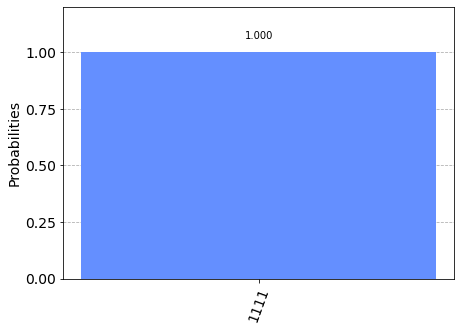

In [359]:
backend = Aer.get_backend('qasm_simulator')
result = execute(grover, backend, shots=1024).result()
ans = result.get_counts() # on sufficient reps > sqrt(n), this converges to 2^n - 1 (our "hit")
visualization.plot_histogram(ans)